The dataset is from UCI Machine Learning Repository - Breat Cancer Wisnconsin (Original)

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Importing dataset

os.chdir("F:/My Python projects")
df = pd.read_csv("breast-cancer-wisconsin.data", header = None)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
## Renaming columns - The column names are taken from the UCI Machine learning site - 
## URL - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29

col_names = ['Id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion',
            'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',
            'class']
df.columns = col_names
df.columns
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_cell_size         699 non-null    int64 
 3   uniformity_cell_shape        699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
## Dropping 'id' column as it is redundant and won't help us in our classification
df.drop('Id', axis = 1, inplace = True)
df.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [5]:
## As we saw earlier, bare_nuclei is an object type. We have to convert it into integer
## but let us check if bare_nuclei is actually an integer type

df['bare_nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [6]:
## Now we can see that it is infact an integer type with sum missing values. 
## We will take care of missing values after sometime
## Converting object to int
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'], errors = 'coerce')
df.dtypes

clump_thickness                  int64
uniformity_cell_size             int64
uniformity_cell_shape            int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
class                            int64
dtype: object

 We were successfully able to convert the column

In [7]:
## Now we also have to check if all the columns have discrete values or not as we are doing a classication
## and not regression

for var in df.columns:
    print(df[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: uniformity_cell_size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: uniformity_cell_shape, dtype: int64
1     407
2      58
3      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: single_epithelial_cell_size, dtype: int64
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: bare_nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromatin, dtype: int64
1     4

To summarise our data

1. All of our columns only contain discrete values
2. There are 10 variables, out of which `class` is a dependent variable (y) while others are independent (x)

In [8]:
## Checking for NA values

df.isna().sum()

clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [9]:
## Lets explore our dependent variable

df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [10]:
## We can see that there are 2 types, 2 stands for benign and 4 stands for malignant
## Lets check the ratio or percentage

df['class'].value_counts()/np.float(len(df))

2    0.655222
4    0.344778
Name: class, dtype: float64

In [11]:
# To check outliers 
(df.describe()).round(2)

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,699.00,699.00,699.00,699.00,699.00,683.00,699.00,699.00,699.00,699.00
mean,4.42,3.13,3.21,2.81,3.22,3.54,3.44,2.87,1.59,2.69
std,2.82,3.05,2.97,2.86,2.21,3.64,2.44,3.05,1.72,0.95
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00
25%,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,2.00
50%,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,2.00
75%,6.00,5.00,5.00,4.00,4.00,6.00,5.00,4.00,1.00,4.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,4.00


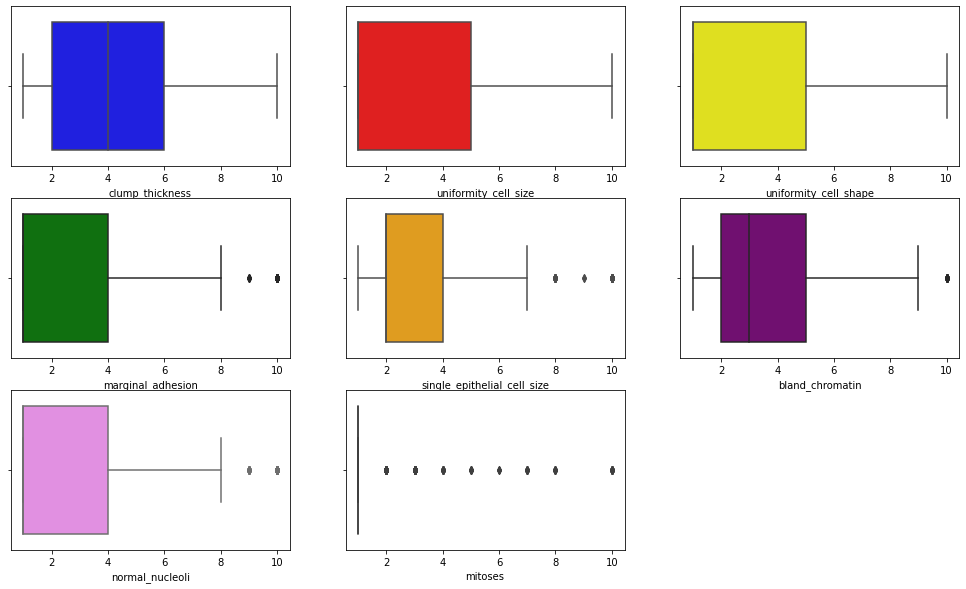

In [12]:

fig = plt.figure(figsize = [17,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.boxplot(x = 'clump_thickness', data = df, color = 'blue')

ax2 = fig.add_subplot(3,3,2)
ax2 = sns.boxplot(x = 'uniformity_cell_size', data = df, color = 'red')

ax3 = fig.add_subplot(3,3,3)
ax3 = sns.boxplot(x = 'uniformity_cell_shape', data = df, color = 'yellow')

ax4 = fig.add_subplot(3,3,4)
ax4 = sns.boxplot(x = 'marginal_adhesion', data = df, color = 'green')

ax5 = fig.add_subplot(3,3,5)
ax5 = sns.boxplot(x = 'single_epithelial_cell_size', data = df, color = 'orange')

ax6 = fig.add_subplot(3,3,6)
ax6 = sns.boxplot(x = 'bland_chromatin', data = df, color = 'purple')

ax7 = fig.add_subplot(3,3,7)
ax7 = sns.boxplot(x = 'normal_nucleoli', data = df, color = 'violet')

ax8 = fig.add_subplot(3,3,8)
ax8 = sns.boxplot(x = 'mitoses', data = df)

As per the above plots:

We have to remove outliers, I will use capping method to remove the outlier.
Also, I didn't make one for bare_nuclei column as it has missing values

Filling the na values for bare_nuclei

```
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.
```

In [13]:
## Get correlation of class with every variable
correlation = df.corr()

correlation['class'].sort_values(ascending = True)

mitoses                        0.423170
single_epithelial_cell_size    0.682785
marginal_adhesion              0.696800
normal_nucleoli                0.712244
clump_thickness                0.716001
bland_chromatin                0.756616
uniformity_cell_size           0.817904
uniformity_cell_shape          0.818934
bare_nuclei                    0.822696
class                          1.000000
Name: class, dtype: float64

### Interpretation
1. There is a positive correlation with all the variable with repsect to `class`
2. So, we can see that there is a strong positive correlation between `Class` and `Bare_Nuclei`, `Class` and `Uniformity_Cell_Shape`, `Class` and `Uniformity_Cell_Size`.

Before we do any pre-processing I will split the data, as I don't want any data leak in the test set

In [14]:
## Declaring the variable

X = df.drop(columns = 'class', axis = 1)
y = df['class']

## Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

print('Checking the dimesions for training set', X_train.shape)
print('Checking the dimesions for testing set', X_test.shape)

X_train.dtypes

Checking the dimesions for training set (559, 9)
Checking the dimesions for testing set (140, 9)


clump_thickness                  int64
uniformity_cell_size             int64
uniformity_cell_shape            int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
dtype: object

In [15]:
## Imputing missing values

# check missing values in numerical variables in X_train

X_train.isnull().sum()

clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    11
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
dtype: int64

In [16]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    5
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
dtype: int64

In [17]:
## Filling the missing values

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace = True)

In [18]:
## Checking again for missing values in X_train

X_train.isnull().sum()

clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
dtype: int64

In [19]:
## Checking for X_test

X_test.isnull().sum()

clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
dtype: int64

We have succesfully removed all the null values

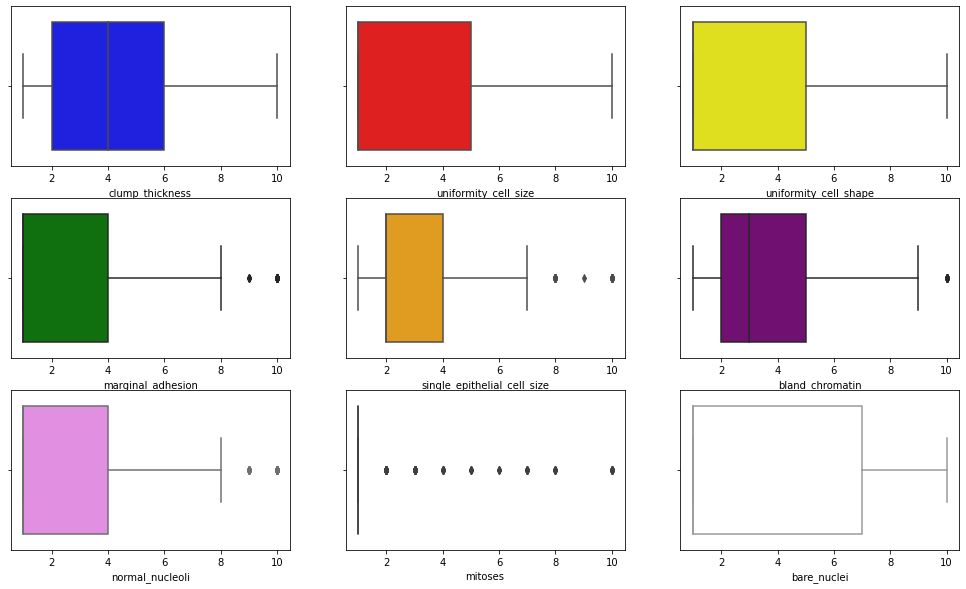

In [20]:
## Capping the outliers - X_train

fig = plt.figure(figsize = [17,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.boxplot(x = 'clump_thickness', data = X_train, color = 'blue')

ax2 = fig.add_subplot(3,3,2)
ax2 = sns.boxplot(x = 'uniformity_cell_size', data = X_train, color = 'red')

ax3 = fig.add_subplot(3,3,3)
ax3 = sns.boxplot(x = 'uniformity_cell_shape', data = X_train, color = 'yellow')

ax4 = fig.add_subplot(3,3,4)
ax4 = sns.boxplot(x = 'marginal_adhesion', data = X_train, color = 'green')

ax5 = fig.add_subplot(3,3,5)
ax5 = sns.boxplot(x = 'single_epithelial_cell_size', data = X_train, color = 'orange')

ax6 = fig.add_subplot(3,3,6)
ax6 = sns.boxplot(x = 'bland_chromatin', data = X_train, color = 'purple')

ax7 = fig.add_subplot(3,3,7)
ax7 = sns.boxplot(x = 'normal_nucleoli', data = X_train, color = 'violet')

ax8 = fig.add_subplot(3,3,8)
ax8 = sns.boxplot(x = 'mitoses', data = X_train)

ax9 = fig.add_subplot(3,3,9)
ax9 = sns.boxplot(x = 'bare_nuclei', data = X_train, color = 'white')

In [36]:
## Capping

lower_percentile = 0.2
higher_percentile = 0.9
low, high = X_train['mitoses'].quantile([lower_percentile, higher_percentile])
X_train[X_train['mitoses'] < low] = low
X_train[X_train['mitoses'] > high] = high

print(X_train['mitoses'])    

print(lower_percentile, 'low percentile: ', low)
print(higher_percentile, 'high percentile: ', high)

338    1
84     3
312    1
339    1
232    1
      ..
496    1
25     1
507    1
442    1
228    1
Name: mitoses, Length: 559, dtype: int64
0.2 low percentile:  1.0
0.9 high percentile:  3.0


<AxesSubplot:>

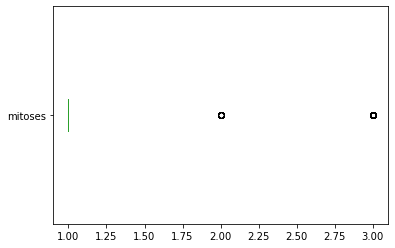

In [37]:
(X_train['mitoses']).plot(kind = 'box', vert = False)

The capping has helped significantly reduce the outliers as compared to before for mitoses

In [40]:
## Now for other variables - normal_nucleoli

low, high = X_train['normal_nucleoli'].quantile([lower_percentile, higher_percentile])
X_train[X_train['normal_nucleoli'] < low] = low
X_train[X_train['normal_nucleoli'] > high] = high

print(X_train['normal_nucleoli'])    

print(lower_percentile, 'low percentile: ', low)
print(higher_percentile, 'high percentile: ', high)

338    1
84     3
312    5
339    3
232    3
      ..
496    1
25     5
507    1
442    1
228    1
Name: normal_nucleoli, Length: 559, dtype: int64
0.2 low percentile:  1.0
0.9 high percentile:  5.0


<AxesSubplot:>

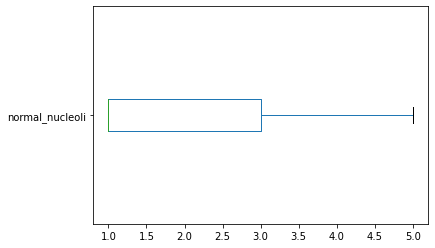

In [39]:
X_train['normal_nucleoli'].plot(kind = 'box', vert = False)

The capping removed all outliers from normal_nucleoli

338    2
84     3
312    3
339    4
232    4
      ..
496    1
25     5
507    1
442    1
228    3
Name: bland_chromatin, Length: 559, dtype: int64
0.1 low percentile:  1.0
0.9 high percentile:  5.0


<AxesSubplot:>

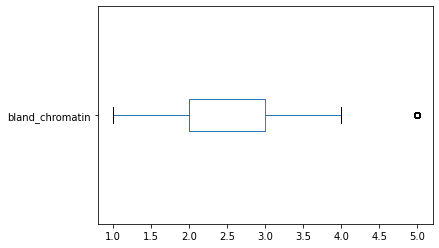

In [49]:
## Now for other variables - normal_nucleoli

lower_percentile_bc = 0.1
higher_percentile_bc = 0.9
low_bc, high_bc = X_train['bland_chromatin'].quantile([lower_percentile_bc, higher_percentile_bc])
X_train[X_train['bland_chromatin'] < low] = low_bc
X_train[X_train['bland_chromatin'] > high] = high_bc

print(X_train['bland_chromatin'])    

print(lower_percentile_bc, 'low percentile: ', low_bc)
print(higher_percentile_bc, 'high percentile: ', high_bc)

X_train['bland_chromatin'].plot(kind = 'box', vert = False)

In [50]:
## Single epithelial cell

low, high = X_train['single_epithelial_cell_size'].quantile([lower_percentile, higher_percentile])
X_train[X_train['single_epithelial_cell_size'] < low] = low
X_train[X_train['single_epithelial_cell_size'] > high] = high

print(X_train['single_epithelial_cell_size'])    

print(lower_percentile, 'low percentile: ', low)
print(higher_percentile, 'high percentile: ', high)

338    2
84     3
312    5
339    2
232    3
      ..
496    2
25     5
507    2
442    2
228    2
Name: single_epithelial_cell_size, Length: 559, dtype: int64
0.2 low percentile:  2.0
0.9 high percentile:  5.0


<AxesSubplot:>

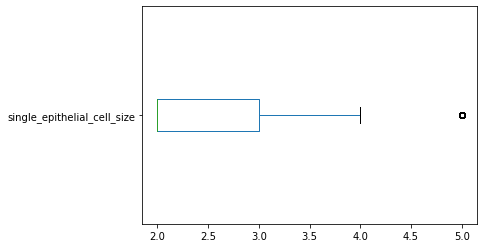

In [53]:
(X_train['single_epithelial_cell_size']).plot(kind = 'box', vert = False)

In [54]:
## Marginal Adhesion - Capping

low, high = X_train['marginal_adhesion'].quantile([lower_percentile, higher_percentile])
X_train[X_train['marginal_adhesion'] < low] = low
X_train[X_train['marginal_adhesion'] > high] = high

print(X_train['marginal_adhesion'])    

print(lower_percentile, 'low percentile: ', low)
print(higher_percentile, 'high percentile: ', high)

338    2
84     3
312    5
339    5
232    3
      ..
496    2
25     5
507    1
442    3
228    2
Name: marginal_adhesion, Length: 559, dtype: int64
0.2 low percentile:  1.0
0.9 high percentile:  5.0


<AxesSubplot:>

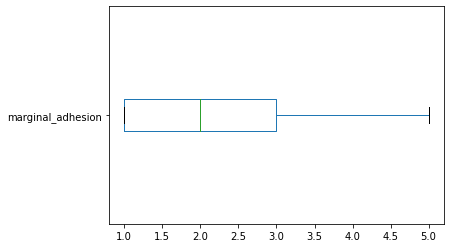

In [55]:
(X_train['marginal_adhesion']).plot(kind = 'box', vert = False)

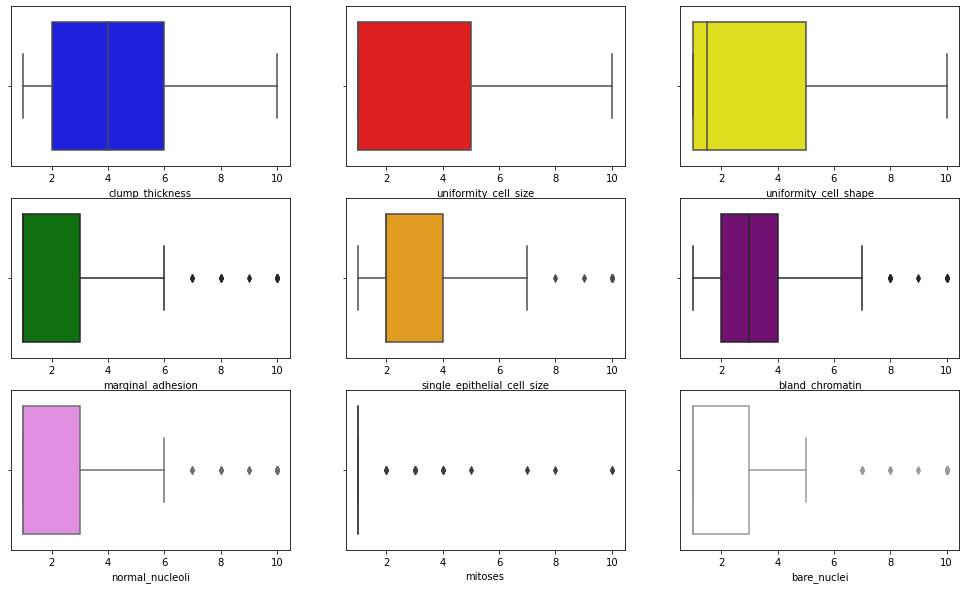

In [56]:
## X_test

fig = plt.figure(figsize = [17,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.boxplot(x = 'clump_thickness', data = X_test, color = 'blue')

ax2 = fig.add_subplot(3,3,2)
ax2 = sns.boxplot(x = 'uniformity_cell_size', data = X_test, color = 'red')

ax3 = fig.add_subplot(3,3,3)
ax3 = sns.boxplot(x = 'uniformity_cell_shape', data = X_test, color = 'yellow')

ax4 = fig.add_subplot(3,3,4)
ax4 = sns.boxplot(x = 'marginal_adhesion', data = X_test, color = 'green')

ax5 = fig.add_subplot(3,3,5)
ax5 = sns.boxplot(x = 'single_epithelial_cell_size', data = X_test, color = 'orange')

ax6 = fig.add_subplot(3,3,6)
ax6 = sns.boxplot(x = 'bland_chromatin', data = X_test, color = 'purple')

ax7 = fig.add_subplot(3,3,7)
ax7 = sns.boxplot(x = 'normal_nucleoli', data = X_test, color = 'violet')

ax8 = fig.add_subplot(3,3,8)
ax8 = sns.boxplot(x = 'mitoses', data = X_test)

ax9 = fig.add_subplot(3,3,9)
ax9 = sns.boxplot(x = 'bare_nuclei', data = X_test, color = 'white')

In [57]:
## Feature Engineering

cols = X_train.columns

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [62]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [63]:
X_train.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,-0.836565,-0.249073,-0.298077,-0.225183,-0.715061,-0.267448,-0.579960,-0.179547,-0.111079
1,-0.275173,0.361593,0.305637,0.417049,0.133600,0.237631,0.156853,0.463829,0.529057
2,0.847612,1.582927,1.513067,1.701512,1.830921,1.247787,1.630480,1.750579,1.809328
3,2.531788,1.582927,1.513067,1.701512,-0.715061,3.773178,0.893666,0.463829,-0.751215
4,2.531788,0.972260,2.116781,0.417049,0.133600,-0.772526,0.893666,0.463829,-0.751215


In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_pred = knn.predict(X_test)
y_pred

array([2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2], dtype=int64)

#### predict_proba method
predict_proba method gives the probabilities for the target variable(2 and 4) in this case, in array form.

2 is for probability of benign cancer and 4 is for probability of malignant cancer.

In [68]:
## probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1.        , 0.33333333, 1.        , 1.        , 1.        ,
       0.33333333, 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.33333333, 0.33333333,
       0.33333333, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.        , 0.33333333, 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 0.33333333, 0.33333333,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.33333

In [69]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0.        , 0.66666667, 0.        , 0.        , 0.        ,
       0.66666667, 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.66666667, 0.66666667,
       0.66666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.66666667, 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.66666667, 0.        , 0.        , 0.66666667, 0.66666667,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.66666

In [70]:
## Checking accuracy 

from sklearn.metrics import accuracy_score

print('model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

model accuracy score: 0.9571


### Compare the train-set and test-set accuracy
Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [71]:
y_pred_train = knn.predict(X_train)

In [72]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9499


In [73]:
## Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9499
Test set score: 0.9571


The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no question of overfitting.

## Compare model accuracy with null accuracy
So, the model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [74]:
y_test.value_counts()

2    92
4    48
Name: class, dtype: int64

We can see that the occurences of most frequent class is 92. So, we can calculate null accuracy by dividing 85 by total number of occurences.

In [75]:
null_accuracy = (92/(48+92))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6571


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6571. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

### Rebuild kNN Classification model using different values of k 

In [76]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

knn_5.fit(X_train, y_train)

y_pred_5 = knn_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9786


In [77]:
knn_6 = KNeighborsClassifier(n_neighbors = 6)

knn_6.fit(X_train, y_train)

y_pred_6 = knn_6.predict(X_test)

print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9643


In [78]:
knn_7 = KNeighborsClassifier(n_neighbors = 7)

knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)

print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9714


In [79]:
knn_8 = KNeighborsClassifier(n_neighbors = 8)

knn_8.fit(X_train, y_train)

y_pred_8 = knn_8.predict(X_test)

print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9714


In [80]:
knn_9 = KNeighborsClassifier(n_neighbors = 9)

knn_9.fit(X_train, y_train)

y_pred_9 = knn_9.predict(X_test)

print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9786


### Interpretation
Our original model accuracy score with k=3 is 0.9571. Now, we can see that we get increased accuracy score of 0.9786 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.

With k=6,7,8 we get accuracy score of 0.9643 & 0.9714, respectively. So, the performance has not improved much.

If we increase k to 9, then accuracy increases again to 0.9786.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [81]:
## Print the Confusion Matrix with k =3 and slice it into four pieces


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[89  3]
 [ 3 45]]

True Positives(TP) =  89

True Negatives(TN) =  45

False Positives(FP) =  3

False Negatives(FN) =  3


In [82]:
## Print the Confusion Matrix with k = 5 and slice it into four pieces

cm_5 = confusion_matrix(y_test, y_pred_5)

print('Confusion matrix\n\n', cm_5)

print('\nTrue Positives(TP) = ', cm_5[0,0])

print('\nTrue Negatives(TN) = ', cm_5[1,1])

print('\nFalse Positives(FP) = ', cm_5[0,1])

print('\nFalse Negatives(FN) = ', cm_5[1,0])

Confusion matrix

 [[90  2]
 [ 1 47]]

True Positives(TP) =  90

True Negatives(TN) =  47

False Positives(FP) =  2

False Negatives(FN) =  1


#### Comment
So, kNN Classification model with k=5 shows more accurate predictions and less number of errors than k=3 model. Hence, we got performance improvement with k=5.

In [83]:
## lets try with k = 6, to check how our performance might have been affected with a lower score

cm_6 = confusion_matrix(y_test, y_pred_6)

print('Confusion matrix\n\n', cm_6)

print('\nTrue Positives(TP) = ', cm_6[0,0])

print('\nTrue Negatives(TN) = ', cm_6[1,1])

print('\nFalse Positives(FP) = ', cm_6[0,1])

print('\nFalse Negatives(FN) = ', cm_6[1,0])

Confusion matrix

 [[90  2]
 [ 3 45]]

True Positives(TP) =  90

True Negatives(TN) =  45

False Positives(FP) =  2

False Negatives(FN) =  3


Here false positive and false negatives increased, so clearly k = 5 is better

In [85]:
## lets check with k = 7
cm_7 = confusion_matrix(y_test, y_pred_7)

print('Confusion matrix\n\n', cm_7)

print('\nTrue Positives(TP) = ', cm_7[0,0])

print('\nTrue Negatives(TN) = ', cm_7[1,1])

print('\nFalse Positives(FP) = ', cm_7[0,1])

print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[90  2]
 [ 2 46]]

True Positives(TP) =  90

True Negatives(TN) =  46

False Positives(FP) =  2

False Negatives(FN) =  2


k = 7 is slight better than k = 6, but slight worse than k = 5, so ultimately lets go with k = 5

<AxesSubplot:>

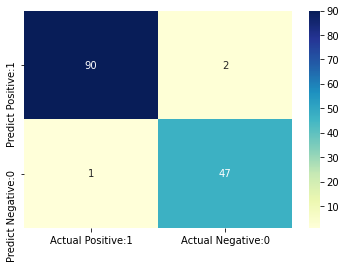

In [86]:
# visualize confusion matrix with seaborn heatmap

plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_5, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        48

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [89]:
## Classification accuracy

TP = cm_5[0,0]
TN = cm_5[1,1]
FP = cm_5[0,1]
FN = cm_5[1,0]

In [90]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9786


In [91]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0214


### Precision
Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as the ratio of TP to (TP + FP).

In [92]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9783


### Recall
Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [94]:
recall = TP/float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9890


In [95]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9890


In [96]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0408


In [97]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9592


#### Support
Support is the actual number of occurrences of the class in our dataset.

In [98]:
y_pred_prob = knn.predict_proba(X_test)[0:10]

y_pred_prob

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [99]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,0.333333,0.666667
2,1.000000,0.000000
3,1.000000,0.000000
4,1.000000,0.000000
5,0.333333,0.666667
6,0.000000,1.000000
7,1.000000,0.000000
8,1.000000,0.000000
9,1.000000,0.000000


In [101]:
## print the first 10 predicted probabilities for class 4 - Probability of malignant cancer

knn.predict_proba(X_test)[0:10, 1]

array([0.        , 0.66666667, 0.        , 0.        , 0.        ,
       0.66666667, 1.        , 0.        , 0.        , 0.        ])

In [102]:
# store the predicted probabilities for class 4 - Probability of malignant cancer

y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

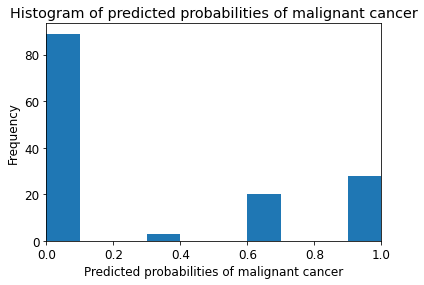

In [103]:
# plot histogram of predicted probabilities


# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

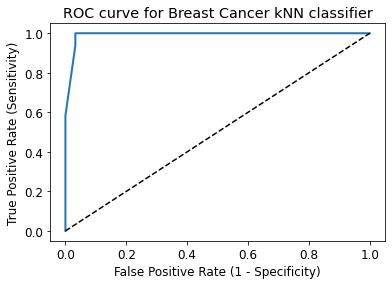

In [104]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [105]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9922


In [106]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9723


#### Interpretation
Our Cross Validated ROC AUC is very close to 1. So, we can conclude that, the KNN classifier is indeed a very good model.